In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
from sklearn import cross_validation as cv
from sklearn import preprocessing

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def step_gradient(X, learning_rate, m, Y_true):
    new_m = [0 for i in range(len(m))]
    N = len(X)
    # Caluculating Derivative of All The The Weights
    for i in range(X.shape[1]):
        # x is All The Columns so effectively the shape of x is (rows,colums)
        x = X[:,i]
        new_m[i] = -x*(Y_true - predict(X,m))
     
    new_m = np.array(new_m)
    # Updating The Slope with Ascent 
    for i in range(X.shape[1]): 
        m[i] -= (learning_rate*np.mean(new_m[i]))
    #print(m)    
    return m

def cost_gd(X,m,Y):
    N = len(m)
    sq_error = ((predict(X,m) - Y)**2).sum()
    
    # Return average squared error among predictions
    return (1.0/(2*N))*sq_error

def predict(X,m):
    # Shape of X and m is (rows,14) and (14,1) repectively
    return np.dot(X,m)

def normalize(X):
    if len(X.shape)==1:
        x= X
        x_mean = np.mean(x)
        x_range = np.amax(x) - np.amin(x)
        x = (x-x_mean)
        x = x/x_range
        X = x
    elif len(X.shape)!=1:
        for i in range(X.shape[1]):
            x= X[:][i]
            x_mean = np.mean(x)
            x_range = np.amax(x) - np.amin(x)
            x = (x-x_mean)
            x = x/x_range
            X[:][i] = x
    return X

def gd_runner(X, learning_rate, num_iterations, Y_true):
    # Initialising The Coefficients having Shape (1, Column_length)
    m = np.zeros((X.shape[1],))
    print ("Start: ", cost_gd(X, m, Y_true))
    for i in range(num_iterations):
        m = step_gradient(X, learning_rate, m, Y_true)
    print ("FINAL: ", cost_gd(X, m, Y_true))
    return  m

def run():
    boston = datasets.load_boston()
    # X is Numpy Array 
    X = boston.data
    
    # Adding Dummy Variables
    Dummy = np.ones(shape=(len(X),1))
    X = np.append(Dummy, X, axis=1)
    Y_true = boston.target
    
    # Normalizing the Features and Target(Y_true)
    X = normalize(X)
    Y_true = normalize(Y_true)
    

    learning_rate = 0.000001
    num_iterations = 100000
    # Calling Step Gradient
    final_m = gd_runner(X, learning_rate,num_iterations, Y_true)
    print(final_m)


In [3]:
run()

Start:  0.753373816843
FINAL:  0.3111200366
[ 0.00032    -0.00205453  0.00173378 -0.00129115  0.0006568   0.0001174
  0.0064325   0.00177454 -0.00323081  0.00399369 -0.00016063 -0.00283287
  0.00042126 -0.01762871]


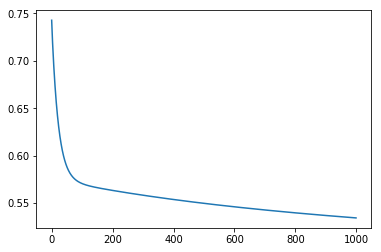

In [7]:
# Cost VS Iterations Plot

def CostVSiterations(X,Y_true):
    learning_rate = 0.000001
    num_iterations = []
    cost = []
    m = np.zeros((X.shape[1],))
    for iterations in range(1000):
        num_iterations.append(iterations)
        m = step_gradient(X, learning_rate, m, Y_true)
        cost.append(cost_gd(X, m, Y_true))
    plt.plot(num_iterations,cost)
    plt.show()

def Graphs():
    boston = datasets.load_boston()
    # X is Numpy Array 
    X = boston.data
    
    # Adding Dummy Variables
    Dummy = np.ones(shape=(len(X),1))
    X = np.append(Dummy, X, axis=1)
    Y_true = boston.target
    
    # Normalizing the Features and Target(Y_true)
    X = normalize(X)
    Y_true = normalize(Y_true)
    
    CostVSiterations(X,Y_true)

Graphs()    